<a href="https://colab.research.google.com/github/gonza77/PortFolio/blob/main/Ventas_pet_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def suma(n,m):
  return n+m


In [ ]:
suma(5,7)

12

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving inu_neko_orderline_clean.csv to inu_neko_orderline_clean.csv


In [3]:
# Print the list of uploaded files
print(uploaded.keys())

dict_keys(['inu_neko_orderline_clean.csv'])


In [7]:
df = pd.read_csv("inu_neko_orderline_clean.csv", encoding='utf-8')

In [13]:
df.head

<bound method NDFrame.head of        trans_id      prod_upc  cust_id             trans_timestamp  \
0      10300097  719638485153  1001019  2021-01-01 07:35:21.439873   
1      10300093   73201504044  1001015  2021-01-01 09:33:37.499660   
2      10300093  719638485153  1001015  2021-01-01 09:33:37.499660   
3      10300093  441530839394  1001015  2021-01-01 09:33:37.499660   
4      10300093  733426809698  1001015  2021-01-01 09:33:37.499660   
...         ...           ...      ...                         ...   
38218  10327860  287663658863  1022098  2021-06-30 15:37:12.821020   
38219  10327960  140160459467  1022157  2021-06-30 15:45:09.872732   
38220  10328009  425361189561  1022189  2021-06-30 15:57:44.295104   
38221  10328089  733426809698  1022236  2021-06-30 15:59:29.801593   
38222  10328109  717036112695  1011924  2021-06-30 17:30:52.205912   

       trans_year  trans_month  trans_day  trans_hour  trans_quantity  \
0            2021            1          1           1   

In [10]:
df.shape

(38223, 16)

In [11]:
df.columns

Index(['trans_id', 'prod_upc', 'cust_id', 'trans_timestamp', 'trans_year',
       'trans_month', 'trans_day', 'trans_hour', 'trans_quantity', 'cust_age',
       'cust_state', 'prod_price', 'prod_title', 'prod_category',
       'prod_animal_type', 'total_sales'],
      dtype='object')

In [21]:
df["cust_age"].mean()

30.062109201266253

In [20]:
df.describe()

,trans_id,prod_upc,cust_id,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,prod_price,total_sales
count,3.822300e+04,3.822300e+04,3.822300e+04,38223.0,38223.000000,38223.000000,38223.000000,38223.000000,38223.000000,38223.000000,38223.000000
mean,1.031407e+07,5.004289e+11,1.010657e+06,2021.0,4.611124,16.615964,16.615964,1.374277,30.062109,30.541081,42.107863
std,8.076082e+03,2.586271e+11,6.117267e+03,0.0,1.387674,8.721896,8.721896,0.713710,6.956725,18.729653,36.614296
min,1.030009e+07,7.320150e+10,1.001012e+06,2021.0,1.000000,1.000000,1.000000,1.000000,18.000000,9.950000,9.950000
25%,1.030707e+07,3.445389e+11,1.005254e+06,2021.0,4.000000,9.000000,9.000000,1.000000,25.000000,18.950000,18.950000
50%,1.031407e+07,4.697572e+11,1.010222e+06,2021.0,5.000000,17.000000,17.000000,1.000000,29.000000,21.950000,32.910000
75%,1.032106e+07,7.196385e+11,1.015806e+06,2021.0,6.000000,24.000000,24.000000,2.000000,34.000000,45.990000,54.950000
max,1.032811e+07,9.695689e+11,1.022252e+06,2021.0,6.000000,31.000000,31.000000,8.000000,79.000000,72.990000,510.930000


In [25]:
df['over_30'] = df['cust_age'] >= 30

In [28]:
sales_by_age = df.groupby('over_30')['total_sales'].sum()


In [29]:
sales_by_age

over_30
False    874245.92
True     735242.94
Name: total_sales, dtype: float64

In [30]:
percentage = sales_by_age[True] / sales_by_age.sum()

In [31]:
#Porcentaje del total de ventas gente mayor o igual a 30 años
percentage

0.4568176632176255

In [32]:
import matplotlib.pyplot as plt

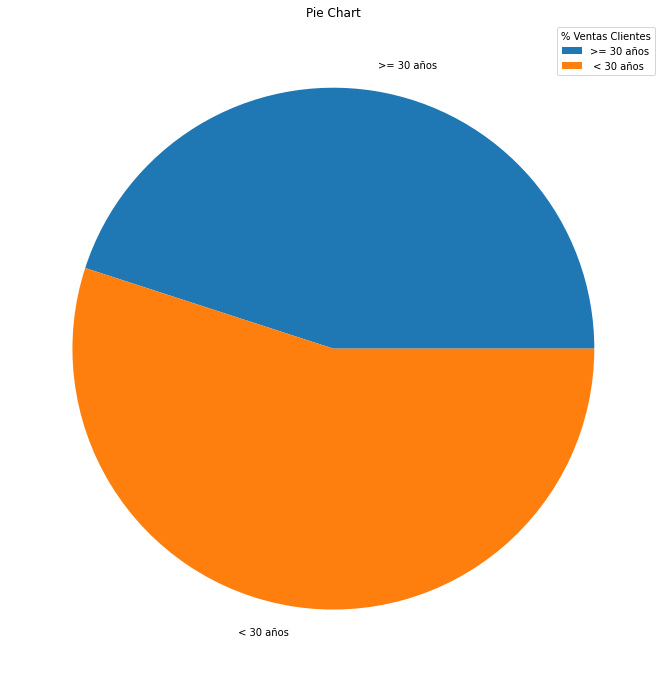

In [42]:
# Create a Series with the labels for the pie chart
labels = ['>= 30 años', ' < 30 años']

# Create a pie chart
ax = pd.Series([0.45, 0.55], index=labels).plot.pie(figsize=(12, 12), title='Pie Chart')
ax.set_ylabel('')
plt.legend(title='% Ventas Clientes')
plt.show()

In [45]:
df["New York"] = df["cust_state"].str.contains('ork', regex=False) == True

In [50]:
df["New York"].sum()

10486

In [55]:
df.head(10)

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales,over_30,New York
0,10300097,719638485153,1001019,2021-01-01 07:35:21.439873,2021,1,1,1,1,20,New York,72.99,Cat Cave,bedding,cat,72.99,False,True
1,10300093,73201504044,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Purrfect Puree,treat,cat,18.95,True,True
2,10300093,719638485153,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,72.99,Cat Cave,bedding,cat,72.99,True,True
3,10300093,441530839394,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,2,34,New York,28.45,Ball and String,toy,cat,56.90,True,True
4,10300093,733426809698,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Yum Fish-Dish,food,cat,18.95,True,True
5,10300091,344934101144,1001012,2021-01-01 10:08:32.241027,2021,1,1,1,1,26,New Jersey,24.95,Fetch Blaster,toy,dog,24.95,False,False
6,10300096,717036112695,1001018,2021-01-01 10:43:40.372766,2021,1,1,1,1,26,Pennsylvania,60.99,Reddy Beddy,bedding,dog,60.99,False,False
7,10300103,242313721729,1001025,2021-01-01 11:05:32.193258,2021,1,1,1,1,24,New Jersey,65.99,Reddy Beddy,bedding,dog,65.99,False,False
8,10300100,100469015054,1001022,2021-01-01 11:39:46.749952,2021,1,1,1,1,27,New York,18.95,Tuna Tasties,treat,cat,18.95,False,True
9,10300102,287663658863,1001024,2021-01-01 11:44:27.467186,2021,1,1,1,1,35,Connecticut,9.95,All Veggie Yummies,treat,dog,9.95,True,False


In [61]:
# Group the DataFrame by the states column
df_grouped = df.groupby('cust_state')

# Print the group names and number of rows in each group
for name, group in df_grouped:
    print(name, len(group))

Alabama 276
Alaska 31
Arizona 432
Arkansas 178
California 2075
Colorado 299
Connecticut 1851
Delaware 43
District of Columbia 40
Florida 1084
Georgia 558
Hawaii 63
Idaho 81
Illinois 607
Indiana 342
Iowa 169
Kansas 137
Kentucky 241
Louisiana 212
Maine 54
Maryland 310
Massachusetts 362
Michigan 494
Minnesota 265
Mississippi 161
Missouri 308
Montana 53
Nebraska 91
Nevada 140
New Hampshire 63
New Jersey 4723
New Mexico 114
New York 10486
North Carolina 548
North Dakota 31
Ohio 608
Oklahoma 193
Oregon 243
Pennsylvania 6542
Rhode Island 42
South Carolina 315
South Dakota 34
Tennessee 351
Texas 1513
Utah 172
Vermont 46
Virginia 456
Washington 368
West Virginia 111
Wisconsin 273
Wyoming 34


In [66]:
values = []

# Iterate over the groups in df_grouped
for name, group in df_grouped:
    # Append a tuple with the name and the length of the group to the list
    values.append((name, len(group)))

# Create a dataframe from the list of tuples
states = pd.DataFrame(values, columns=['State', 'Number'])

# Display the dataframe
states

,State,Number
0,Alabama,276
1,Alaska,31
2,Arizona,432
3,Arkansas,178
4,California,2075
5,Colorado,299
6,Connecticut,1851
7,Delaware,43
8,District of Columbia,40
9,Florida,1084


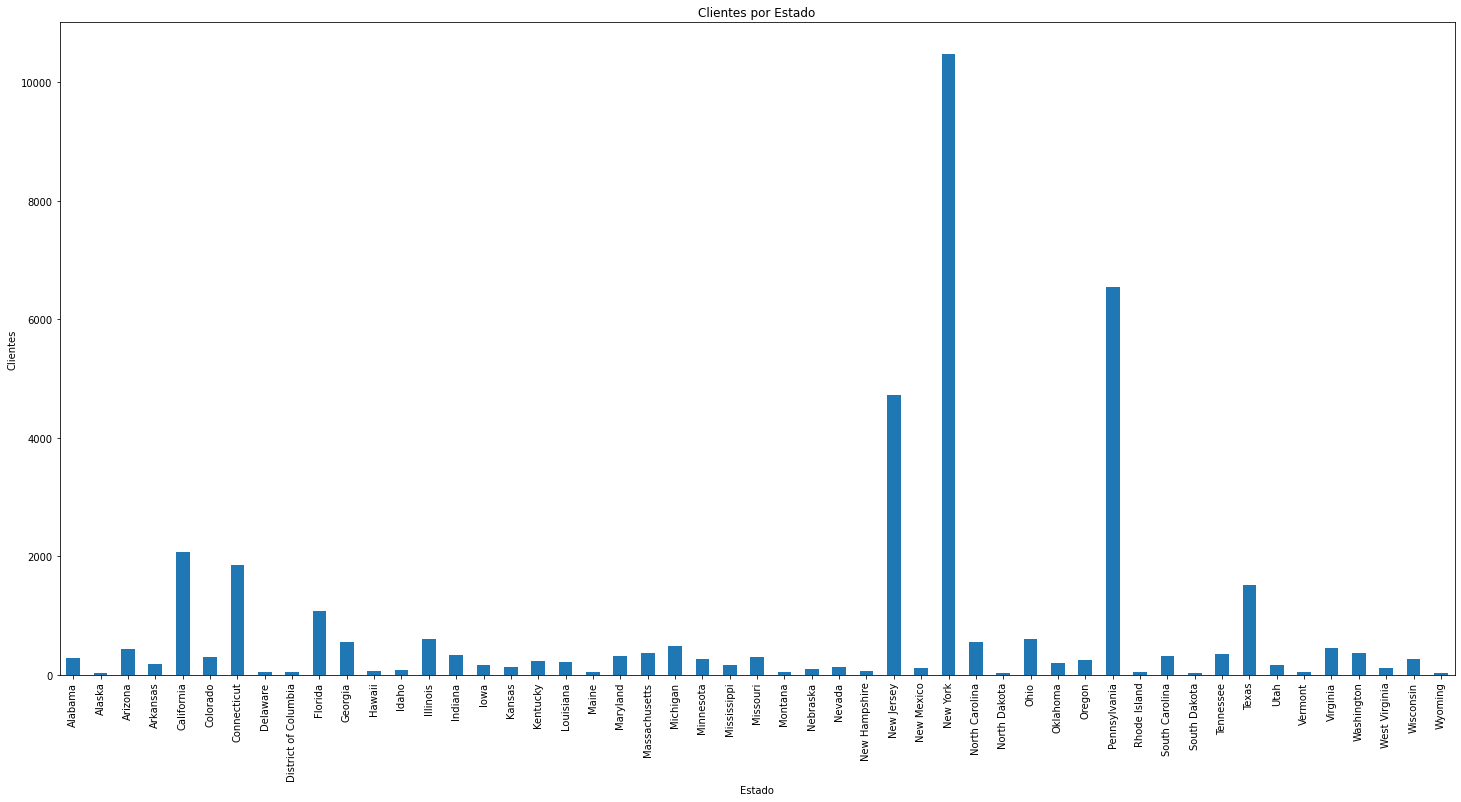

In [76]:
states.plot.bar(x='State', y='Number', legend=None, figsize=(25,12))

# Add a title and axis labels
plt.title('Clientes por Estado')
plt.xlabel('Estado')
plt.ylabel('Clientes')

# Show the plot
plt.show()

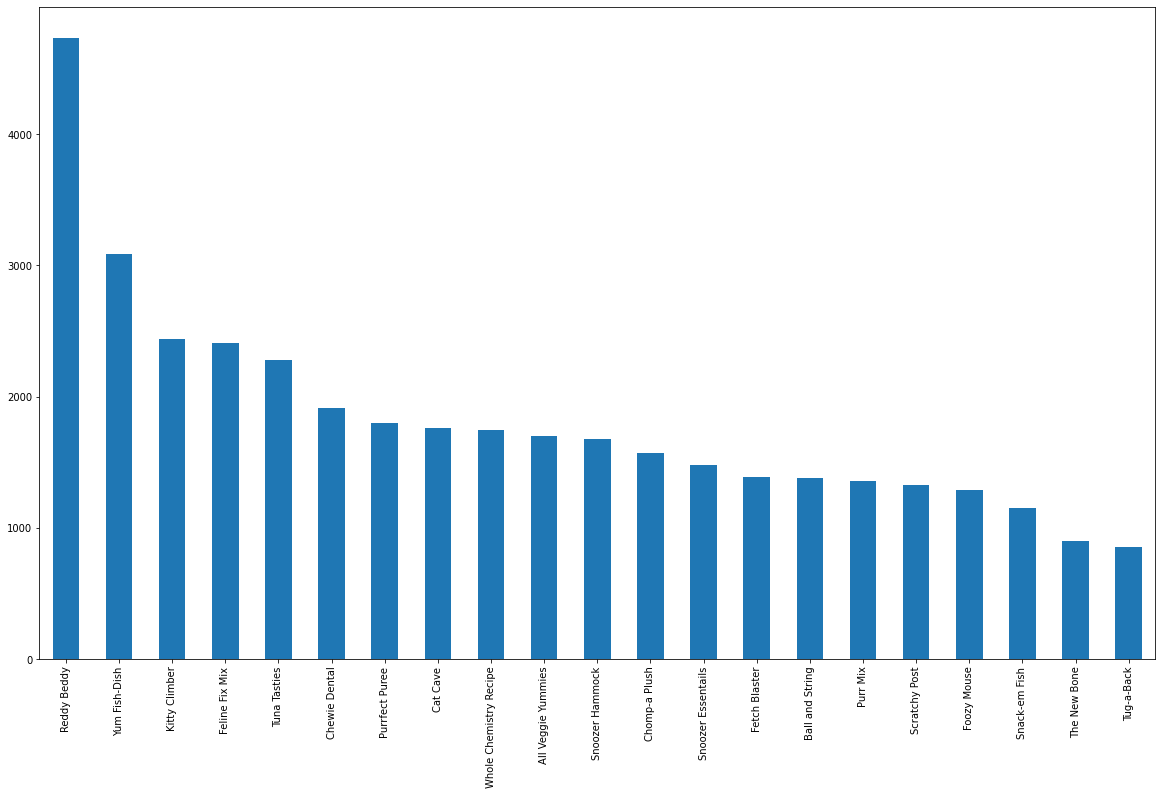

In [87]:
counts = df['prod_title'].value_counts()
counts.plot(kind='bar', figsize = (20,12))
plt.show()